In [0]:
import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from keras.utils import to_categorical

In [0]:
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

ERROR! Session/line number was not unique in database. History logging moved to new session 59
11493376/11490434 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

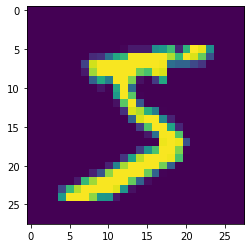

In [8]:
plt.imshow(X_train[0])

In [0]:
num_pixels = X_train.shape[1]*X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


In [0]:
X_train = X_train/255
X_test = X_test/255

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


##Build a NN

In [0]:
# define classification model
def classification_model():
  model = Sequential()
  model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  #compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [17]:
model = classification_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 11s - loss: 0.1851 - accuracy: 0.9439 - val_loss: 0.1106 - val_accuracy: 0.9652
Epoch 2/10
1875/1875 - 11s - loss: 0.0785 - accuracy: 0.9762 - val_loss: 0.0904 - val_accuracy: 0.9711
Epoch 3/10
1875/1875 - 10s - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0756 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 - 10s - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.0859 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 - 11s - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0803 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 - 11s - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0767 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 - 11s - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.0810 - val_accuracy: 0.9789
Epoch 8/10
1875/1875 - 11s - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0800 - val_accuracy: 0.9819
Epoch 9/10
1875/1875 - 10s - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0894 - val_accuracy: 0.9805
Epoch 10/10
1875/1875 - 11s - loss: 0.0167 - accuracy: 0.9947 - val_loss:

In [18]:
print('Accuracy: {}%\n Error:{}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.98089998960495%
 Error:0.01910001039505005


In [0]:
model.save('classification_model.h5')

In [0]:
from tensorflow.python.keras.models import load_model

In [25]:
pretrained_model = load_model('classification_model.h5')